Tarea 3 - pregunta 2

¿En qué medida el acceso a computador e internet en el hogar explica las diferencias en el puntaje global de las pruebas Saber 11, una vez considerado el estrato socioeconómico, en Cundinamarca? 

### Limpieza y extracción

In [109]:
#librerias necesarias para exploración y limpieza

import numpy as np
import pandas as pd 

#subir archivo con los datos
df = pd.read_csv("Datos_Cundinamarca.csv")
df.head()

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_PAIS_RESIDE,FAMI_CUARTOSHOGAR,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20224,URBANO,N,MIXTO,UNICA,GRANADA,03/09/2004,F,COLOMBIA,Dos,...,No,No,No,A-,42.0,26.0,45.0,42.0,43.0,196.0
1,20224,URBANO,N,MIXTO,SABATINA,CHOACHÍ,10/02/2005,M,COLOMBIA,Tres,...,Si,Si,Si,A-,40.0,60.0,46.0,54.0,50.0,258.0
2,20224,URBANO,NaN,MIXTO,COMPLETA,SOACHA,27/12/2004,M,COLOMBIA,NaN,...,NaN,Si,NaN,A1,54.0,61.0,58.0,55.0,55.0,285.0
3,20224,URBANO,N,MIXTO,COMPLETA,SOACHA,25/06/2006,F,COLOMBIA,Tres,...,Si,Si,Si,A2,62.0,54.0,64.0,63.0,60.0,302.0
4,20224,RURAL,N,MIXTO,SABATINA,SASAIMA,18/05/2006,M,COLOMBIA,Dos,...,No,Si,Si,A1,54.0,45.0,46.0,48.0,52.0,241.0


In [110]:
#valores faltantes en todas las columnas
df.isna().sum()

PERIODO                          0
COLE_AREA_UBICACION            198
COLE_BILINGUE                77355
COLE_GENERO                      0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
ESTU_FECHANACIMIENTO             0
ESTU_GENERO                    265
ESTU_PAIS_RESIDE                 0
FAMI_CUARTOSHOGAR             6558
FAMI_EDUCACIONMADRE          10699
FAMI_EDUCACIONPADRE          10753
FAMI_ESTRATOVIVIENDA         11609
FAMI_PERSONASHOGAR            6620
FAMI_TIENEAUTOMOVIL           6736
FAMI_TIENECOMPUTADOR          7473
FAMI_TIENEINTERNET            9766
FAMI_TIENELAVADORA            6420
DESEMP_INGLES                   71
PUNT_INGLES                     28
PUNT_MATEMATICAS                 0
PUNT_SOCIALES_CIUDADANAS    171841
PUNT_C_NATURALES            171841
PUNT_LECTURA_CRITICA        171841
PUNT_GLOBAL                 171841
dtype: int64

In [111]:
#voy a quedarme solo con las columnas que me sirven para responder mi pregunta 
columnas_interes = [
    "PUNT_GLOBAL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_ESTRATOVIVIENDA",
    "COLE_MCPIO_UBICACION"
]

df = df[columnas_interes]

#verificando que este bien
df


,PUNT_GLOBAL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_ESTRATOVIVIENDA,COLE_MCPIO_UBICACION
0,196.0,No,No,Estrato 1,GRANADA
1,258.0,Si,Si,Estrato 1,CHOACHÍ
2,285.0,NaN,Si,Estrato 2,SOACHA
3,302.0,Si,Si,Estrato 2,SOACHA
4,241.0,No,Si,Estrato 2,SASAIMA
...,...,...,...,...,...
470813,325.0,No,No,Estrato 1,NEMOCON
470814,191.0,Si,No,Estrato 2,PARATEBUENO
470815,220.0,Si,No,Estrato 2,FÓMEQUE
470816,220.0,Si,No,Estrato 2,FÓMEQUE


In [112]:
#analizando como se ven los nulos de los datos para luego quitarlos

print("Filas antes de limpiar:", len(df))

print("Valores únicos computador:")
print(df["FAMI_TIENECOMPUTADOR"].unique())

print("Valores únicos internet:")
print(df["FAMI_TIENEINTERNET"].unique())

print("Valores únicos estrato:")
print(df["FAMI_ESTRATOVIVIENDA"].unique())

Filas antes de limpiar: 470818
Valores únicos computador:
<StringArray>
['No', 'Si', nan]
Length: 3, dtype: str
Valores únicos internet:
<StringArray>
['No', 'Si', nan]
Length: 3, dtype: str
Valores únicos estrato:
<StringArray>
[  'Estrato 1',   'Estrato 2', 'Sin Estrato',   'Estrato 3',   'Estrato 4',
           nan,   'Estrato 5',   'Estrato 6']
Length: 8, dtype: str


quitamos los NaN de puntaje global , tiene computador e internet. En la columna de estrato quitamos "NaN" y "Sin Estrato"

In [113]:
import numpy as np

#reemplazar strings problemáticos por NaN reales
df["PUNT_GLOBAL"] = df["PUNT_GLOBAL"].replace("NaN", np.nan)
df["FAMI_TIENECOMPUTADOR"] = df["FAMI_TIENECOMPUTADOR"].replace("NaN", np.nan)
df["FAMI_TIENEINTERNET"] = df["FAMI_TIENEINTERNET"].replace("NaN", np.nan)

#en estrato reemplazamos ambos casos
df["FAMI_ESTRATOVIVIENDA"] = df["FAMI_ESTRATOVIVIENDA"].replace(
    ["nan", "Sin estrato"], np.nan
)

#puntaje global debe ser numerico
df["PUNT_GLOBAL"] = pd.to_numeric(df["PUNT_GLOBAL"], errors="coerce")

df_limpio = df.dropna(subset=[
    "PUNT_GLOBAL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_ESTRATOVIVIENDA"
])

#cuantas borre
print("Filas originales:", df.shape[0])
print("Filas después de limpieza:", df_limpio.shape[0])
print("Filas eliminadas:", df.shape[0] - df_limpio.shape[0])

Filas originales: 470818
Filas después de limpieza: 287977
Filas eliminadas: 182841


Asignamos 1 cuando es "Si" 
Asignamos 0 cuando es "No"
Para los estratos cambiamos de "estrato 1" a 1 con todos los estratos. 

In [114]:
#verificando el tipo de datos que hay
print(df_limpio.dtypes)

PUNT_GLOBAL             float64
FAMI_TIENECOMPUTADOR        str
FAMI_TIENEINTERNET          str
FAMI_ESTRATOVIVIENDA        str
COLE_MCPIO_UBICACION        str
dtype: object


In [115]:
# Pasar todo a minúsculas y quitar espacios
df_limpio["FAMI_TIENECOMPUTADOR"] = (
    df_limpio["FAMI_TIENECOMPUTADOR"].str.strip().str.lower()
)

df_limpio["FAMI_TIENEINTERNET"] = (
    df_limpio["FAMI_TIENEINTERNET"].str.strip().str.lower()
)

df_limpio["FAMI_ESTRATOVIVIENDA"] = (
    df_limpio["FAMI_ESTRATOVIVIENDA"].str.strip().str.lower()
)

In [116]:
df_limpio["FAMI_TIENECOMPUTADOR"] = df_limpio["FAMI_TIENECOMPUTADOR"].map({
    "si": 1,
    "sí": 1,
    "no": 0
})

df_limpio["FAMI_TIENEINTERNET"] = df_limpio["FAMI_TIENEINTERNET"].map({
    "si": 1,
    "sí": 1,
    "no": 0
})

In [117]:
df_limpio["FAMI_ESTRATOVIVIENDA"] = df_limpio["FAMI_ESTRATOVIVIENDA"].map({
    "estrato 1": 1,
    "estrato 2": 2,
    "estrato 3": 3,
    "estrato 4": 4,
    "estrato 5": 5,
    "estrato 6": 6
})

In [118]:
print(df_limpio.dtypes)

PUNT_GLOBAL             float64
FAMI_TIENECOMPUTADOR      int64
FAMI_TIENEINTERNET        int64
FAMI_ESTRATOVIVIENDA    float64
COLE_MCPIO_UBICACION        str
dtype: object


In [123]:

print(df_limpio["FAMI_ESTRATOVIVIENDA"].unique())

[ 1.  2. nan  3.  4.  5.  6.]


quitar nulos del puntaje global

In [120]:
#hay demasiados valores vacios para el puntaje global, no los voy a tener en cuenta 
df = df.dropna(subset=["PUNT_GLOBAL"])

#vuelvo a revisar 
print(df.isna().sum())

#revisar cuantos estudiantes me quedaron despues de quitar el puntaje global 
df.shape

df

PUNT_GLOBAL                0
FAMI_TIENECOMPUTADOR    4663
FAMI_TIENEINTERNET      7935
FAMI_ESTRATOVIVIENDA    8611
COLE_MCPIO_UBICACION       0
dtype: int64


,PUNT_GLOBAL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_ESTRATOVIVIENDA,COLE_MCPIO_UBICACION
0,196.0,No,No,Estrato 1,GRANADA
1,258.0,Si,Si,Estrato 1,CHOACHÍ
2,285.0,NaN,Si,Estrato 2,SOACHA
3,302.0,Si,Si,Estrato 2,SOACHA
4,241.0,No,Si,Estrato 2,SASAIMA
...,...,...,...,...,...
470812,218.0,Si,No,Estrato 1,GUAYABETAL
470813,325.0,No,No,Estrato 1,NEMOCON
470814,191.0,Si,No,Estrato 2,PARATEBUENO
470815,220.0,Si,No,Estrato 2,FÓMEQUE


In [121]:
#variables tecnologicas 
df_brechadigital= df.dropna(subset=["FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR"])

#verificar que si haya eliminado esto
print(df_brechadigital.isna().sum())

PUNT_GLOBAL                0
FAMI_TIENECOMPUTADOR       0
FAMI_TIENEINTERNET         0
FAMI_ESTRATOVIVIENDA    1104
COLE_MCPIO_UBICACION       0
dtype: int64


esto si tiene datos del numero de personas que tienen internet y computador

In [122]:
#verificando las variables categorica
df["FAMI_PERSONASHOGAR"] = pd.to_numeric(df["FAMI_PERSONASHOGAR"], errors="coerce")
df["FAMI_CUARTOSHOGAR"] = pd.to_numeric(df["FAMI_CUARTOSHOGAR"], errors="coerce")

#quitando los nulos porque no puedo trabajar con eso
df_hacinamiento = df.dropna(subset=["FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR"])

#creando la nueva columna de hacimiento (#personas por cuarto)
df_hacinamiento = df.dropna(subset=["FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR"])

df_hacinamiento["PERSONAS_POR_CUARTO"] = (
    df_hacinamiento["FAMI_PERSONASHOGAR"] /
    df_hacinamiento["FAMI_CUARTOSHOGAR"]
)

df_hacinamiento

#verificar 
print(df_hacinamiento.isna().sum())

KeyError: 'FAMI_PERSONASHOGAR'

parece que despues de conservar las personas con puntaje global, estas personas no reportaron cuantas personas hay en el hogar ni cuantos cuartos hay en el hogar. No la puedo usar por falta de disponibilidad de datos. 

In [ ]:

#asegurarme de que las variables deben ser numericas
cols_numericas = [
    "PUNT_GLOBAL","PUNT_MATEMATICAS","PUNT_LECTURA_CRITICA",
    "PUNT_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PUNT_INGLES",
    "FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR"
]

for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [ ]:
#eliminamos las columnas de cuartos y personas en el hogar puesto que no tienen valores

columnas_interes = [
    "PUNT_GLOBAL",
    "PUNT_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENELAVADORA",
    "FAMI_ESTRATOVIVIENDA"
]

df = df[columnas_interes]

#nos aseguramos de quitar las filas vacias de los siguientes valores 
df_estrato = df.dropna(subset=["FAMI_ESTRATOVIVIENDA"])
df_brechadigital = df.dropna(subset=["FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR"])
df_bienes = df.dropna(subset=["FAMI_TIENEAUTOMOVIL","FAMI_TIENELAVADORA"])


In [ ]:
#verficiando que más hace falta por revisar
df_bienes.isna().sum()

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   25
FAMI_TIENECOMPUTADOR         193
FAMI_TIENEINTERNET          5142
FAMI_TIENEAUTOMOVIL            0
FAMI_TIENELAVADORA             0
FAMI_ESTRATOVIVIENDA        5881
dtype: int64

In [ ]:
df_estrato.isna().sum()

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   23
FAMI_TIENECOMPUTADOR        2025
FAMI_TIENEINTERNET           463
FAMI_TIENEAUTOMOVIL         2228
FAMI_TIENELAVADORA          1963
FAMI_ESTRATOVIVIENDA           0
dtype: int64

In [ ]:
df_brechadigital.isna().sum()  

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   25
FAMI_TIENECOMPUTADOR           0
FAMI_TIENEINTERNET             0
FAMI_TIENEAUTOMOVIL          402
FAMI_TIENELAVADORA           173
FAMI_ESTRATOVIVIENDA        1104
dtype: int64

tendremos que trabajar por dataframes para cada medida que queremos trabajar. Se da por terminada la limpieza de estos datos en especifico. Entonces, tendremos diferentes dataframes para cada una de las necesidades que se deban evaluar.  

### Analisis de datos

Análisis general del Puntaje Global 

In [ ]:
#quitar los nulos
df = df.dropna(subset=["PUNT_GLOBAL"])

#estadisticas descriptivas
df["PUNT_GLOBAL"].describe()

count    298977.000000
mean        260.884961
std          47.061333
min          17.000000
25%         227.000000
50%         259.000000
75%         293.000000
max         483.000000
Name: PUNT_GLOBAL, dtype: float64

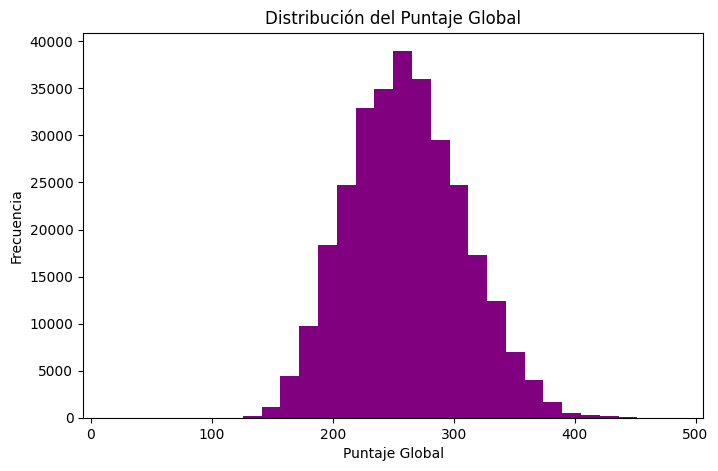

In [ ]:
#histograma de la distribución del puntaje global 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["PUNT_GLOBAL"], bins=30, color="purple")
plt.title("Distribución del Puntaje Global")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

Estrato vs puntaje 

In [ ]:
#agrupar el estrato por el puntaje global 
df_estrato.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean()

FAMI_ESTRATOVIVIENDA
Estrato 1      243.823301
Estrato 2      258.650779
Estrato 3      271.669006
Estrato 4      293.365485
Estrato 5      305.173778
Estrato 6      312.861218
Sin Estrato    237.589650
Name: PUNT_GLOBAL, dtype: float64

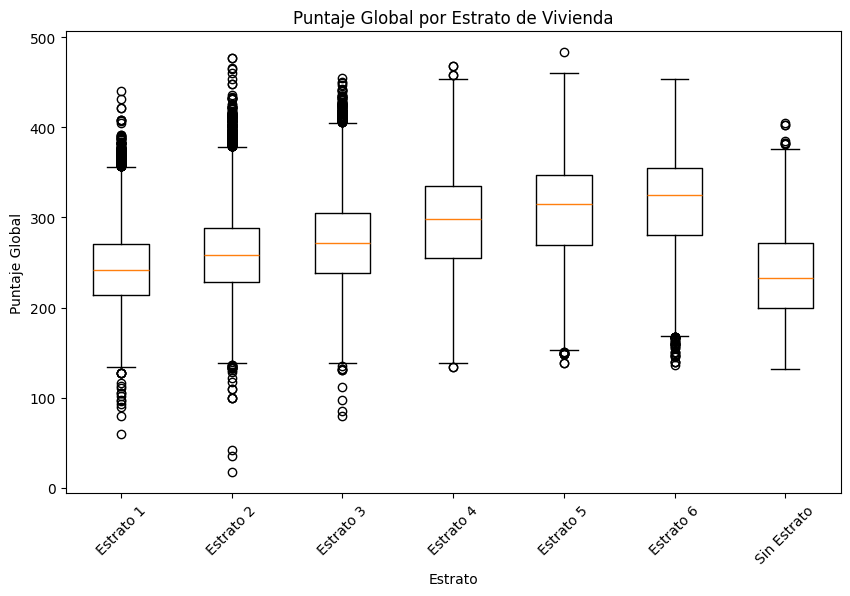

In [ ]:
#asegurandonos de que no hayan nulos en el estrato
df_estrato = df.dropna(subset=["FAMI_ESTRATOVIVIENDA"])

#categorias ordenadas 
estratos = sorted(df_estrato["FAMI_ESTRATOVIVIENDA"].unique())

#lista de los puntajes en las categorias 
datos = [
    df_estrato[df_estrato["FAMI_ESTRATOVIVIENDA"] == e]["PUNT_GLOBAL"]
    for e in estratos
]

#graficar
plt.figure(figsize=(10,6))
plt.boxplot(datos)

#etiquetas y titulos 
plt.xticks(range(1, len(estratos)+1), estratos, rotation=45, color="black")
plt.title("Puntaje Global por Estrato de Vivienda")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")

plt.show()

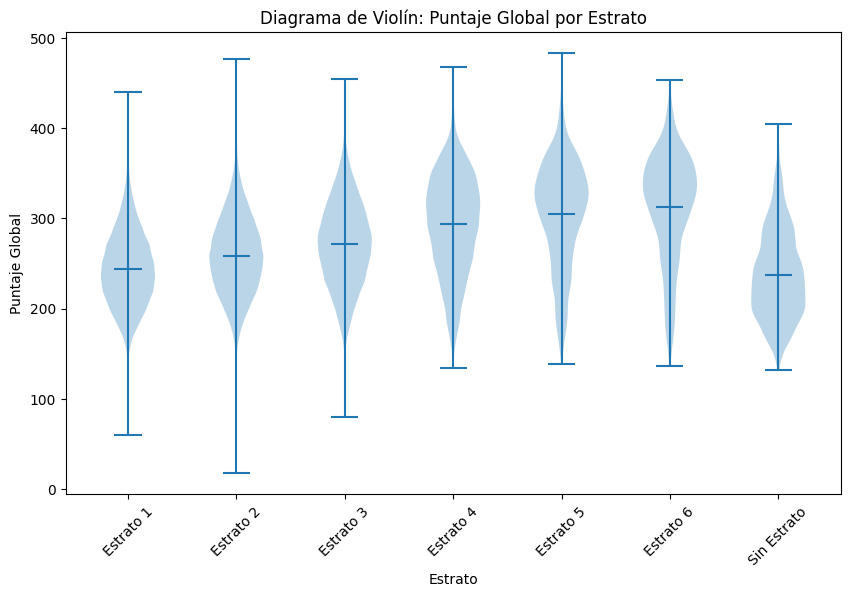

In [ ]:
# Crear gráfico
plt.figure(figsize=(10,6))
plt.violinplot(datos, showmeans=True)

plt.xticks(range(1, len(estratos)+1), estratos, rotation=45)
plt.title("Diagrama de Violín: Puntaje Global por Estrato")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")

plt.show()

In [ ]:
df_scatter = df[["FAMI_ESTRATOVIVIENDA", "PUNT_GLOBAL"]].copy()

# Convertir puntaje a numérico
df_scatter["PUNT_GLOBAL"] = pd.to_numeric(
    df_scatter["PUNT_GLOBAL"],
    errors="coerce"
)

# Extraer número del estrato (por si viene como texto)
df_scatter["ESTRATO_NUM"] = (
    df_scatter["FAMI_ESTRATOVIVIENDA"]
    .astype(str)
    .str.extract('(\d+)')
    .astype(float)
)

# Eliminar nulos
df_scatter = df_scatter.dropna()

print("Filas finales:", df_scatter.shape[0])

print(df["FAMI_ESTRATOVIVIENDA"].unique()[:10])
print(df["PUNT_GLOBAL"].dtype)

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\danis\AppData\Local\Temp\ipykernel_27480\4085055182.py:13: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


Filas finales: 287912
<StringArray>
[  'Estrato 1',   'Estrato 2', 'Sin Estrato',   'Estrato 3',   'Estrato 4',
           nan,   'Estrato 5',   'Estrato 6']
Length: 8, dtype: str
float64


C:\Users\danis\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


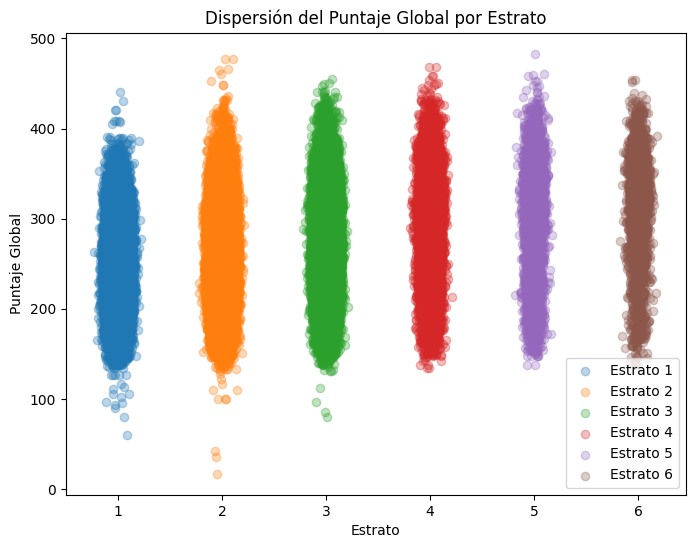

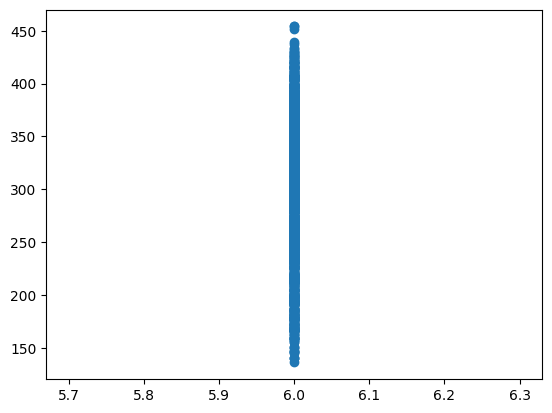

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))

for estrato in sorted(df_scatter["ESTRATO_NUM"].unique()):
    subset = df_scatter[df_scatter["ESTRATO_NUM"] == estrato]
    
    # agregar pequeño ruido
    x_jitter = subset["ESTRATO_NUM"] + np.random.normal(0, 0.05, size=len(subset))
    
    plt.scatter(
        x_jitter,
        subset["PUNT_GLOBAL"],
        alpha=0.3,
        label=f"Estrato {int(estrato)}"
    )

plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")
plt.title("Dispersión del Puntaje Global por Estrato")
plt.legend()
plt.show()

plt.scatter(subset["ESTRATO_NUM"], subset["PUNT_GLOBAL"])

Brecha digital vs Puntaje global 

In [ ]:
#agrupar para ver la media de cuando tiene internet 
df_tecnologia.groupby("FAMI_TIENEINTERNET")["PUNT_GLOBAL"].mean()


NameError: name 'df_tecnologia' is not defined

In [ ]:
#agrupar para ver la media de cuando tiene computador 

df_tecnologia.groupby("FAMI_TIENECOMPUTADOR")["PUNT_GLOBAL"].mean()

FAMI_TIENECOMPUTADOR
No    244.038605
Si    269.641446
Name: PUNT_GLOBAL, dtype: float64

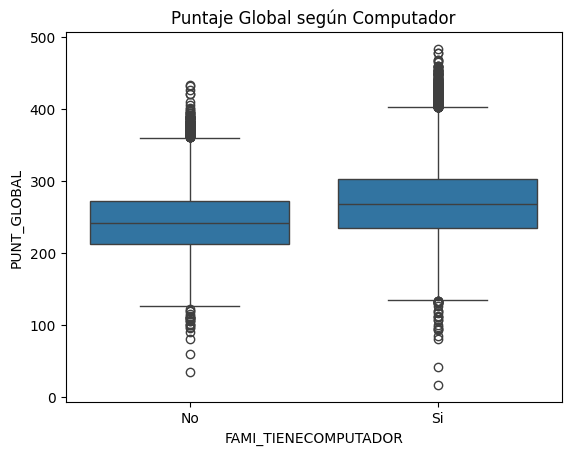

In [ ]:
plt.figure()
sns.boxplot(x="FAMI_TIENECOMPUTADOR", y="PUNT_GLOBAL", data=df)
plt.title("Puntaje Global según Computador")
plt.show()

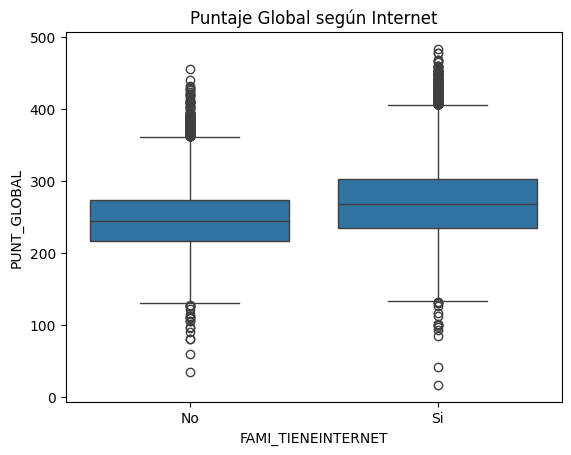

In [ ]:
plt.figure()
sns.boxplot(x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL", data=df)
plt.title("Puntaje Global según Internet")
plt.show()

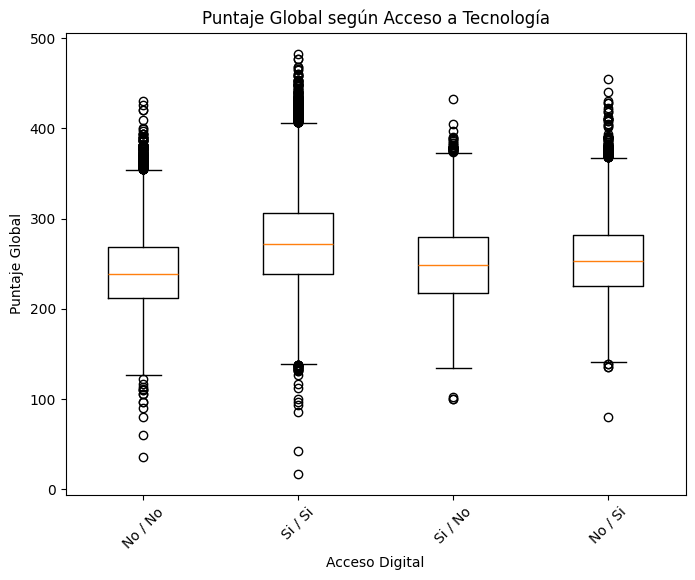

In [ ]:
#asegurarse de que no tenga nulos 
df_tecnologia = df.dropna(subset=["FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR"])

#nueva columna juntando que si tienen internet la familia o si tienen computador
df_tecnologia["BRECHA_DIGITAL"] = (
    df_tecnologia["FAMI_TIENEINTERNET"] + " / " +
    df_tecnologia["FAMI_TIENECOMPUTADOR"]
)

#categorias
categorias = df_tecnologia["BRECHA_DIGITAL"].unique()

#array con los datos
datos = [
    df_tecnologia[df_tecnologia["BRECHA_DIGITAL"] == c]["PUNT_GLOBAL"]
    for c in categorias
]

#figura para la grafica
plt.figure(figsize=(8,6))
plt.boxplot(datos)

#etiqueta y titulos
plt.xticks(range(1, len(categorias)+1), categorias, rotation=45)
plt.title("Puntaje Global según Acceso a Tecnología")
plt.xlabel("Acceso Digital")
plt.ylabel("Puntaje Global")

plt.show()

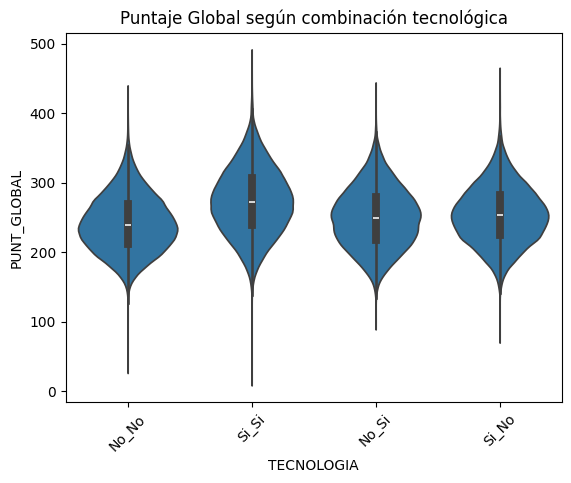

In [ ]:
#brecha tecnologica en diagramas de violin
df["TECNOLOGIA"] = df["FAMI_TIENECOMPUTADOR"] + "_" + df["FAMI_TIENEINTERNET"]

#figura, titulo y etiquetas
plt.figure()
sns.violinplot(x="TECNOLOGIA", y="PUNT_GLOBAL", data=df)
plt.xticks(rotation=45)
plt.title("Puntaje Global según combinación tecnológica")
plt.show()

In [ ]:
#combinación de la brecha tecnologica

df.groupby("FAMI_TIENECOMPUTADOR")["PUNT_GLOBAL"].mean()
df.groupby("FAMI_TIENEINTERNET")["PUNT_GLOBAL"].mean()
df.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean()

df.groupby(["FAMI_TIENECOMPUTADOR", "FAMI_TIENEINTERNET"])["PUNT_GLOBAL"].mean()

FAMI_TIENECOMPUTADOR  FAMI_TIENEINTERNET
No                    No                    241.492312
                      Si                    249.900785
Si                    No                    254.105726
                      Si                    272.972299
Name: PUNT_GLOBAL, dtype: float64

In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Tratando de hacer graficas que combinen la variable de control , variables independientes y dependientes

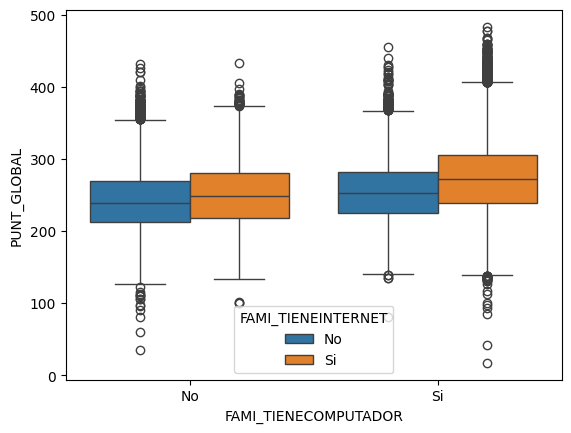

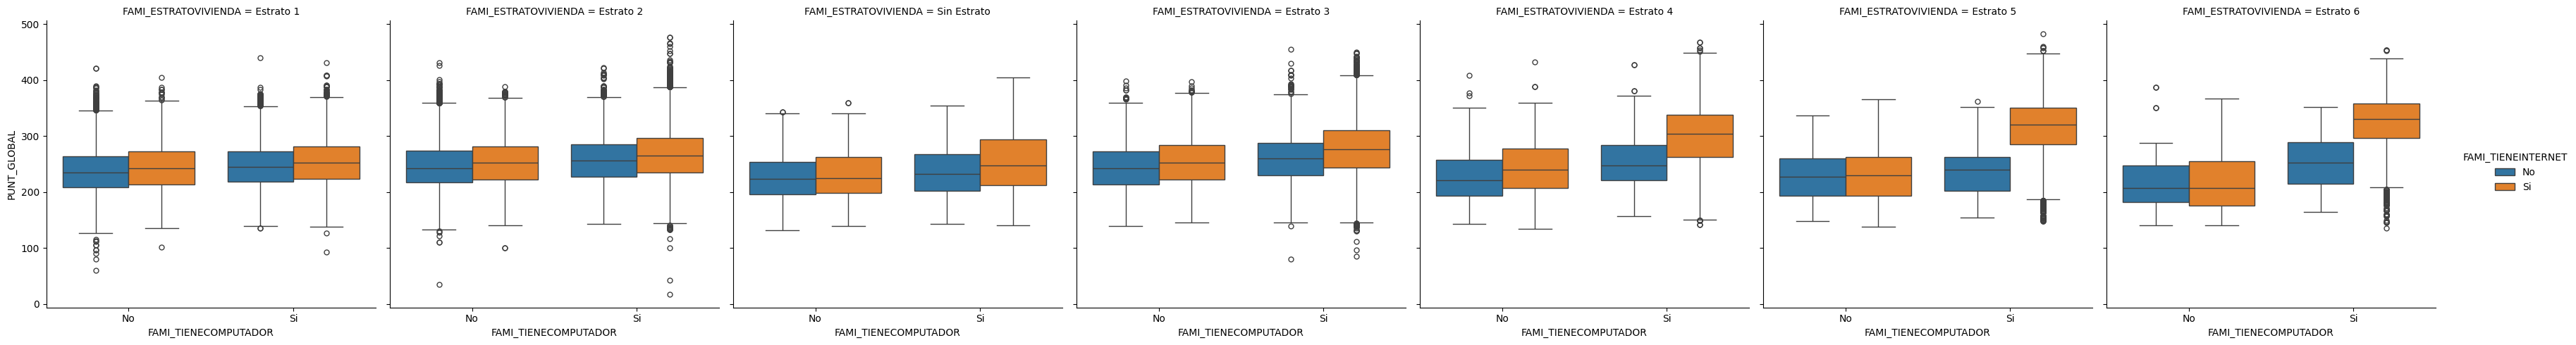

In [ ]:
sns.boxplot(
    x="FAMI_TIENECOMPUTADOR",
    y="PUNT_GLOBAL",
    hue="FAMI_TIENEINTERNET",
    data=df
)

sns.catplot(
    x="FAMI_TIENECOMPUTADOR",
    y="PUNT_GLOBAL",
    hue="FAMI_TIENEINTERNET",
    col="FAMI_ESTRATOVIVIENDA",
    kind="box",
    data=df
)

Modelo de regresión


In [ ]:
#seleccionar variables
df_modelo = df[['PUNT_GLOBAL', 
                'FAMI_TIENEINTERNET', 
                'FAMI_TIENECOMPUTADOR', 
                'FAMI_ESTRATOVIVIENDA']].copy()

#limpiar texto
df_modelo['FAMI_TIENEINTERNET'] = df_modelo['FAMI_TIENEINTERNET'].astype(str).str.strip().str.lower()
df_modelo['FAMI_TIENECOMPUTADOR'] = df_modelo['FAMI_TIENECOMPUTADOR'].astype(str).str.strip().str.lower()
df_modelo['FAMI_ESTRATOVIVIENDA'] = df_modelo['FAMI_ESTRATOVIVIENDA'].astype(str)

#recodificar internet y computador
df_modelo['FAMI_TIENEINTERNET'] = df_modelo['FAMI_TIENEINTERNET'].map({'sí':1, 'si':1, 'no':0})
df_modelo['FAMI_TIENECOMPUTADOR'] = df_modelo['FAMI_TIENECOMPUTADOR'].map({'sí':1, 'si':1, 'no':0})

#extraer número del estrato
df_modelo['FAMI_ESTRATOVIVIENDA'] = df_modelo['FAMI_ESTRATOVIVIENDA'].str.extract('(\d+)')

#convertir a numérico
df_modelo['FAMI_TIENEINTERNET'] = pd.to_numeric(df_modelo['FAMI_TIENEINTERNET'], errors='coerce')
df_modelo['FAMI_TIENECOMPUTADOR'] = pd.to_numeric(df_modelo['FAMI_TIENECOMPUTADOR'], errors='coerce')
df_modelo['FAMI_ESTRATOVIVIENDA'] = pd.to_numeric(df_modelo['FAMI_ESTRATOVIVIENDA'], errors='coerce')
df_modelo['PUNT_GLOBAL'] = pd.to_numeric(df_modelo['PUNT_GLOBAL'], errors='coerce')

#eliminar nulos finales
df_modelo = df_modelo.dropna()

#ahora sí convertir a int
df_modelo[['FAMI_TIENEINTERNET',
           'FAMI_TIENECOMPUTADOR',
           'FAMI_ESTRATOVIVIENDA']] = df_modelo[['FAMI_TIENEINTERNET',
                                                 'FAMI_TIENECOMPUTADOR',
                                                 'FAMI_ESTRATOVIVIENDA']].astype(int)

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\danis\AppData\Local\Temp\ipykernel_24188\1465877498.py:17: SyntaxWarning: invalid escape sequence '\d'
  df_modelo['FAMI_ESTRATOVIVIENDA'] = df_modelo['FAMI_ESTRATOVIVIENDA'].str.extract('(\d+)')


In [ ]:
import statsmodels.api as sm

#definir el modelo
X = df_modelo[['FAMI_TIENECOMPUTADOR',
               'FAMI_TIENEINTERNET',
               'FAMI_ESTRATOVIVIENDA']]

y = df_modelo['PUNT_GLOBAL']

#intercepto
X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                 1.333e+04
Date:                Sun, 22 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:11:27   Log-Likelihood:            -1.4843e+06
No. Observations:              285577   AIC:                         2.969e+06
Df Residuals:                  285573   BIC:                         2.969e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  222.0083 

Mapa de calor de las correlaciones

Número de filas después de limpiar: 0


c:\Users\danis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\danis\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


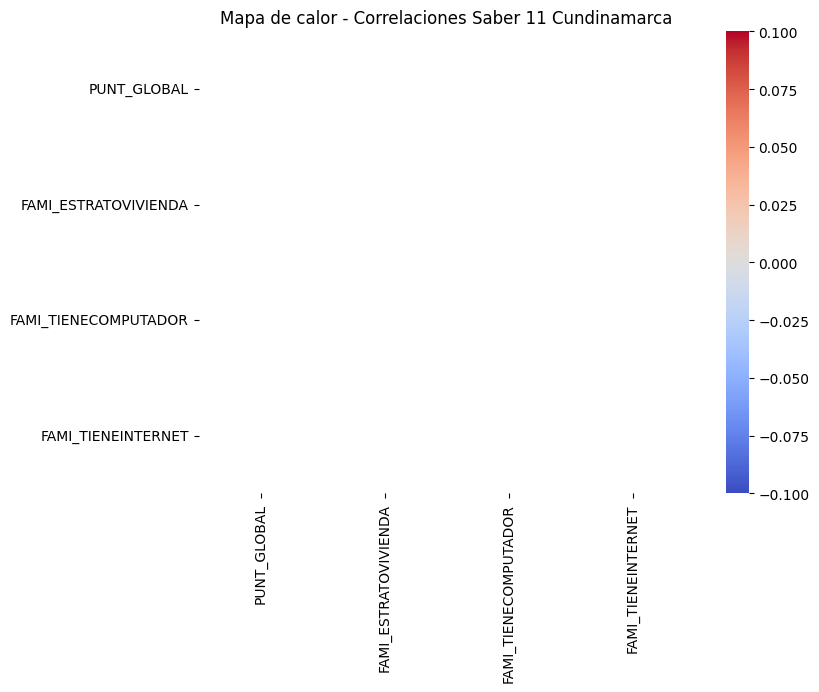

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas = [
    "PUNT_GLOBAL",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET"
]

df_heat = df[columnas].copy()

# Estrato numérico
df_heat["FAMI_ESTRATOVIVIENDA"] = pd.to_numeric(
    df_heat["FAMI_ESTRATOVIVIENDA"], errors="coerce"
)

# Normalizar texto
df_heat["FAMI_TIENECOMPUTADOR"] = df_heat["FAMI_TIENECOMPUTADOR"].astype(str).str.upper()
df_heat["FAMI_TIENEINTERNET"] = df_heat["FAMI_TIENEINTERNET"].astype(str).str.upper()

# Convertir a binario
df_heat["FAMI_TIENECOMPUTADOR"] = df_heat["FAMI_TIENECOMPUTADOR"].replace({
    "SI":1, "SÍ":1, "1":1,
    "NO":0, "2":0
})

df_heat["FAMI_TIENEINTERNET"] = df_heat["FAMI_TIENEINTERNET"].replace({
    "SI":1, "SÍ":1, "1":1,
    "NO":0, "2":0
})

# Eliminar nulos después de convertir
df_heat = df_heat.dropna()

print("Número de filas después de limpiar:", len(df_heat))

# Matriz de correlación
corr = df_heat.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - Correlaciones Saber 11 Cundinamarca")
plt.show()

Filas antes de limpiar: 298977
Valores únicos computador:
<StringArray>
['No', 'Si', nan]
Length: 3, dtype: str
Valores únicos internet:
<StringArray>
['No', 'Si', nan]
Length: 3, dtype: str
Valores únicos estrato:
<StringArray>
[  'Estrato 1',   'Estrato 2', 'Sin Estrato',   'Estrato 3',   'Estrato 4',
           nan,   'Estrato 5',   'Estrato 6']
Length: 8, dtype: str
